## [Not Done Yet] Does Seawater Feel Warmer in Fall Than in Summer Along the Oregon Coast?
A friend of mine (M) was talking about going surfing today. I was surprised, because I thought the seawater would be colder than it was a few weeks ago (late summer). Another friend (K) mentioned that this might be due to the delayed response of seawater to solar heating. M also said she had heard from others that seawater is often warmer during this time of year (mid-fall) than in summer.

However, I argued that what we actually feel might be due to the temperature difference between the water and the air. In summer, the seawater is typically colder than the air, so we feel cold when we get into the water. In contrast, in the fall, the seawater can be warmer than the air, so when we get into the water, it feels warm.

To figure out what is really happening, I downloaded one-year (2024) buoy data from National Buoy Data Center (NOAA), which include both air temperature and sea surface temperature, to analyze how these temperatures vary throughout the seasons.

### Python packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

### Data
- Data center:   National Buoy Data Center, NOAA
- Station:       46278, Tillamook Bay South Jetty, OR (270)
- Information:   Scripps Institution of Oceanography
- Location:      45.561 N 123.991 W (45°33'40" N 123°59'26" W)
- Time:          2024 (historical)
- Website:       https://www.ndbc.noaa.gov/station_history.php?station=46278
- Format:        txt file

In [12]:
# Load buoy data
# Directory and filename
basedir = "/Users/huang/Data/Buoy"
fn = Path(basedir, "US_west_46278_2024.txt")

na_vals = [99, 99.0, 99.00, 999, 999.0, 999.00, 9999, 9999.0, 9999.00]

# Read (first header row only; skip the units row)
df = pd.read_csv(
    fn,
    sep=r"\s+",
    header=0,
    skiprows=[1],
    na_values=na_vals,
    engine="python",
)

# Build timestamp (handles both 2- and 4-digit years)
y = df["YY"].astype(int)
year = y.where(y >= 100, 2000 + y)

dt = pd.to_datetime(
    dict(year=year, month=df["MM"], day=df["DD"], hour=df["hh"], minute=df["mm"]),
    errors="coerce",
    utc=True,
)

# Set index and drop time-part columns
df = df.set_index(dt).drop(columns=["YY", "MM", "DD", "hh", "mm"])
df.index.name = "time"
df

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
time,,,,,,,,,,,,,
2024-01-01 00:00:00+00:00,NaN,NaN,NaN,2.19,12.50,8.50,272.0,NaN,10.2,11.5,NaN,NaN,NaN
2024-01-01 00:30:00+00:00,NaN,NaN,NaN,2.10,9.09,8.28,268.0,NaN,10.2,11.5,NaN,NaN,NaN
2024-01-01 01:00:00+00:00,NaN,NaN,NaN,2.14,10.00,8.39,273.0,NaN,10.1,11.5,NaN,NaN,NaN
2024-01-01 01:30:00+00:00,NaN,NaN,NaN,2.13,11.11,8.46,279.0,NaN,9.4,11.4,NaN,NaN,NaN
2024-01-01 02:00:00+00:00,NaN,NaN,NaN,2.30,12.50,8.74,275.0,NaN,9.0,11.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 21:30:00+00:00,NaN,NaN,NaN,1.79,10.53,8.16,271.0,NaN,7.8,10.5,NaN,NaN,NaN
2024-12-31 22:00:00+00:00,NaN,NaN,NaN,1.62,10.53,7.73,268.0,NaN,8.3,10.5,NaN,NaN,NaN
2024-12-31 22:30:00+00:00,NaN,NaN,NaN,1.71,11.76,7.94,271.0,NaN,8.1,10.5,NaN,NaN,NaN


### Variables

In [13]:
atmp = df["ATMP"]  # Air temperature (°C)
sst = df["WTMP"]   # Sea surface temperature (°C)

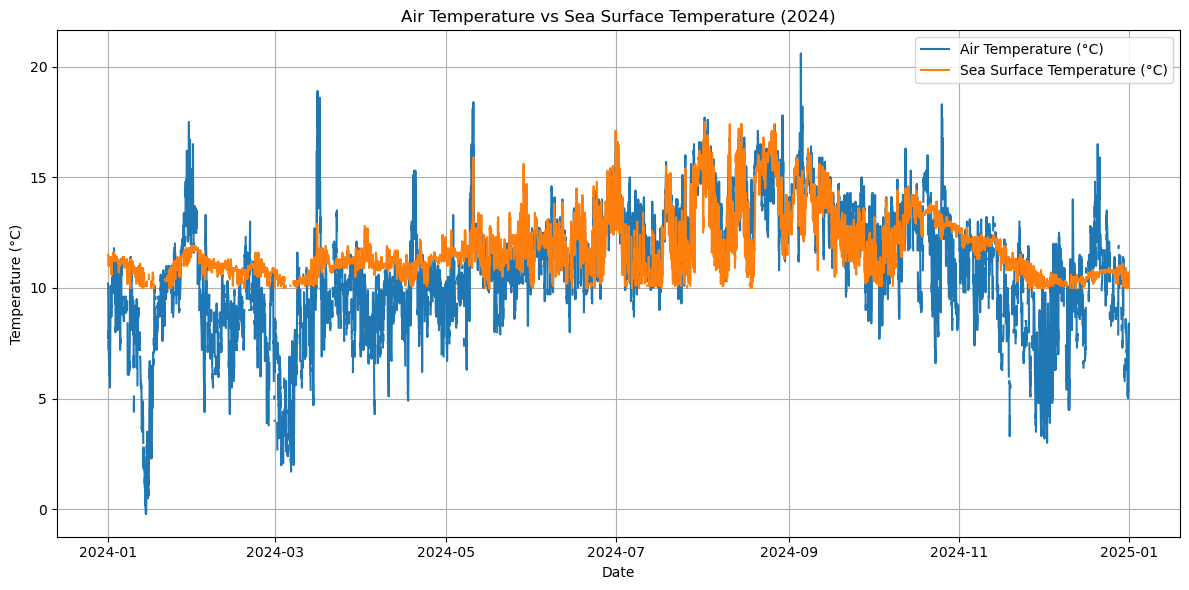

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, atmp, label="Air Temperature (°C)")
plt.plot(df.index, sst, label="Sea Surface Temperature (°C)")

plt.title("Air Temperature vs Sea Surface Temperature (2024)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()